In [6]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import random


In [8]:
data = pd.read_csv("/content/drive/MyDrive/Project/5589.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,70,72,74,85,86,88,90,92,93,94,95,97,98,99,102,104,106,108,109,110,111,113,114,115,118,120) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,FK_Trip,FK_MeasurementType,Created_Date,Updated_Date,id,start_time_utc,end_time_utc,@vid,@uid,@ts,@t,@rec,acc.xyz.z,acc.xyz.y,acc.xyz.x,@tag,obd.acc_long.value,obd.acc_trans.value,obd.acc_yaw.value,obd.asr_trq_req_dyn.value,obd.asr_trq_req_st.value,obd.brk_trq_elec.value,obd.brk_trq_req_dvr.value,obd.brk_trq_req_elec.value,obd.cons_avg.value,obd.f_dist.value,obd.msr_trq_req.value,obd.odo.value,obd.rpm.value,obd.rpm_elec.value,obd.rpm_fl.value,obd.rpm_fr.value,obd.rpm_rl.value,...,start_position_lat,start_position_lng,end_position_lat,end_position_lng,device,duration,distanceKm,tag,start_position_display.ntk_geocode_time,start_position_display.city,start_position_display.street_type,start_position_display.country,start_position_display.street_name,start_position_display.provider,start_position_display.precision,start_position_display.longitude,start_position_display.county,start_position_display.state,start_position_display.street,start_position_display.postal_code,start_position_display.postcode,start_position_display.address,start_position_display.latitude,start_position_display.type,end_position_display.ntk_geocode_time,end_position_display.city,end_position_display.street_type,end_position_display.country,end_position_display.street_name,end_position_display.provider,end_position_display.precision,end_position_display.longitude,end_position_display.county,end_position_display.state,end_position_display.street,end_position_display.postal_code,end_position_display.postcode,end_position_display.address,end_position_display.latitude,end_position_display.type
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,36c12ed9-3d71-4c87-985c-0156f3f3a3a8,2020-12-23 10:35:54.541221+00:00,0001-01-01 00:00:00+00:00,00000000-0000-0000-0000-000000000000,0001-01-01T00:00:00+00:00,0001-01-01T00:00:00+00:00,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.563541+00:00,event.vehicle.motor,2020-11-01T11:55:12.955799+00:00,NaN,NaN,NaN,vehicle/motor/running,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.73293,12.46941,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,43f6e697-19b3-40f8-b95d-06c205fd3758,a69d9fe0-7896-49e2-9e8d-e36f0d54f286,2020-12-23 10:28:26.506338+00:00,0001-01-01 00:00:00+00:00,43f6e697-19b3-40f8-b95d-06c205fd3758,2020-11-01T11:54:51.563541+00:00,2020-11-01T12:10:14.399773+00:00,NaN,NaN,0001-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.73293,12.46941,55.80245,12.37965,85d44a66-4ecb-4fdc-91be-0a18b2d7ebdb,2020-12-23T00:15:22.836232+00:00,16.71529,personal,148.0,Gladsaxe,NaN,Denmark,Hillerødmotorvejen,OpenStreetMap,street_segment,12.469413,Gladsaxe Municipality,Capital Region of Denmark,Hillerødmotorvejen,2860.0,2860.0,"Hillerødmotorvejen, Gladsaxe, 2860, DK",55.732936,geocode,39.0,Farum,NaN,Denmark,Hillerødmotorvejen,OpenStreetMap,street_segment,12.37962,Furesø Municipality,Capital Region of Denmark,Hillerødmotorvejen,3520.0,3520.0,"Hillerødmotorvejen, Farum, 3520, DK",55.802459,geocode
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,a1917940-8ad5-4296-b0ac-4cb9d070ce47,2020-12-23 11:40:43.998383+00:00,0001-01-01 00:00:00+00:00,00000000-0000-0000-0000-000000000000,0001-01-01T00:00:00+00:00,0001-01-01T00:00:00+00:00,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.576198+00:00,obd.whl_trq_est,2020-11-01T15:4

In [9]:
# reading all columns in the dataset
l=data.columns
l=list(data.columns)
l

['MeasurementId',
 'TS_or_Distance',
 'T',
 'lat',
 'lon',
 'message',
 'isComputed',
 'FK_Trip',
 'FK_MeasurementType',
 'Created_Date',
 'Updated_Date',
 'id',
 'start_time_utc',
 'end_time_utc',
 '@vid',
 '@uid',
 '@ts',
 '@t',
 '@rec',
 'acc.xyz.z',
 'acc.xyz.y',
 'acc.xyz.x',
 '@tag',
 'obd.acc_long.value',
 'obd.acc_trans.value',
 'obd.acc_yaw.value',
 'obd.asr_trq_req_dyn.value',
 'obd.asr_trq_req_st.value',
 'obd.brk_trq_elec.value',
 'obd.brk_trq_req_dvr.value',
 'obd.brk_trq_req_elec.value',
 'obd.cons_avg.value',
 'obd.f_dist.value',
 'obd.msr_trq_req.value',
 'obd.odo.value',
 'obd.rpm.value',
 'obd.rpm_elec.value',
 'obd.rpm_fl.value',
 'obd.rpm_fr.value',
 'obd.rpm_rl.value',
 'obd.rpm_rr.value',
 'obd.sb_rem_fl.value',
 'obd.sb_rem_fr.value',
 'obd.sb_stat_rc.value',
 'obd.sb_stat_rl.value',
 'obd.sb_stat_rr.value',
 'obd.spd.value',
 'obd.spd_veh.value',
 'obd.strg_acc.value',
 'obd.strg_ang.value',
 'obd.strg_pos.value',
 'obd.temp.value',
 'obd.temp_ext.value',
 'obd.

In [10]:
# get all columns
# used function Random to get total no.of columns and rows
columns = []
for column_name in data.columns:
  # print (column_name, end="\t")
  columns.append(column_name)
print ("\nlength =", len(data.columns))
# number of rows in dataset
the_chosen_one = random.choice(columns)
number_of_rows = len(data[the_chosen_one])
print (number_of_rows)


length = 121
1929870


In [11]:
data.shape

(1929870, 121)

In [12]:
data.isnull().sum()

MeasurementId                             0
TS_or_Distance                            0
T                                         0
lat                                 1929151
lon                                 1929151
                                     ...   
end_position_display.postal_code    1929868
end_position_display.postcode       1929868
end_position_display.address        1929868
end_position_display.latitude       1929868
end_position_display.type           1929868
Length: 121, dtype: int64

In [13]:
# divide the dataset into some limit size
# limit_size = 1000
LIMIT = 10000
iterations = min(LIMIT, number_of_rows)
new_data= [columns[:]]
for index in range(iterations):
  row = []
  nans = 0
  for column_name in columns:
    row.append(data[column_name][index])
    if str(data[column_name][index]) == "nan":
      nans += 1
  if len(row) != nans:
    new_data.append(row[:])

In [14]:
# JSON data - flatten 
import json
message_labels = []
for index in range(1, len(new_data)):
  if str(new_data[index][5]) != "nan":
    message = json.loads(new_data[index][5])
    for label_name in message:
      if label_name not in message_labels:
        message_labels.append(label_name)

In [15]:
# JSON label attributes
message_labels[:]

['id',
 'start_time_utc',
 'end_time_utc',
 '@vid',
 '@uid',
 '@ts',
 '@tag',
 '@t',
 '@rec',
 'start_position_lat',
 'start_position_lng',
 'start_position_display',
 'end_position_lat',
 'end_position_lng',
 'end_position_display',
 'device',
 'duration',
 'distanceKm',
 'tag',
 'obd.whl_trq_est.value',
 'obd.trq_eff.value',
 'obd.trq_req.value',
 'obd.rpm.value',
 'obd.strg_ang.value',
 'obd.strg_pos.value',
 'obd.strg_acc.value',
 'obd.acc_long.value',
 'obd.acc_trans.value',
 'obd.acc_yaw.value',
 'obd.rpm_fl.value',
 'obd.spd_veh.value',
 'obd.rpm_fr.value',
 'obd.whl_prs_fl.value',
 'obd.whl_prs_rl.value',
 'obd.whl_prs_fr.value',
 'obd.whl_prs_rr.value',
 'obd.rpm_elec.value',
 'obd.whl_trq_pot_ri.value',
 'obd.brk_trq_elec.value',
 'obd.brk_trq_req_dvr.value',
 'obd.brk_trq_req_elec.value',
 'obd.temp.value',
 'obd.asr_trq_req_dyn.value',
 'obd.msr_trq_req.value',
 'obd.asr_trq_req_st.value',
 'obd.rpm_rl.value',
 'obd.rpm_rr.value',
 'acc.xyz.z',
 'acc.xyz.y',
 'acc.xyz.x',
 

In [16]:
for column_name in columns:
  if column_name in message_labels:
    print (column_name, end=" ")

id start_time_utc end_time_utc @vid @uid @ts @t @rec acc.xyz.z acc.xyz.y acc.xyz.x @tag obd.acc_long.value obd.acc_trans.value obd.acc_yaw.value obd.asr_trq_req_dyn.value obd.asr_trq_req_st.value obd.brk_trq_elec.value obd.brk_trq_req_dvr.value obd.brk_trq_req_elec.value obd.cons_avg.value obd.f_dist.value obd.msr_trq_req.value obd.odo.value obd.rpm.value obd.rpm_elec.value obd.rpm_fl.value obd.rpm_fr.value obd.rpm_rl.value obd.rpm_rr.value obd.sb_rem_fl.value obd.sb_rem_fr.value obd.sb_stat_rc.value obd.sb_stat_rl.value obd.sb_stat_rr.value obd.spd.value obd.spd_veh.value obd.strg_acc.value obd.strg_ang.value obd.strg_pos.value obd.temp.value obd.temp_ext.value obd.time.value obd.trac_cons.value obd.trip_cons.value obd.trip_cons_avg.value obd.trip_dist.value obd.trip_spd_avg.value obd.trq_eff.value obd.trq_req.value obd.whl_prs_fl.value obd.whl_prs_fr.value obd.whl_prs_rl.value obd.whl_prs_rr.value obd.whl_trq_est.value obd.whl_trq_pot_ri.value obd.ww_f_req.value obd.ww_f_stat.value o

In [17]:
actual_values = len(data["lat"]) - data["lat"].isnull().sum()
actual_values

719

In [18]:
index = 0
print (index)
message = json.loads(data["message"][index])
for label_name in message:
  if label_name in columns:
    print (data[label_name][index], "\t\t", message[label_name])

0
00000000-0000-0000-0000-000000000000 		 00000000-0000-0000-0000-000000000000
0001-01-01T00:00:00+00:00 		 0001-01-01T00:00:00+00:00
0001-01-01T00:00:00+00:00 		 0001-01-01T00:00:00+00:00
23.0 		 23
4565c040-cbfb-dfb0-29c9-2a5041babfa6 		 4565c040-cbfb-dfb0-29c9-2a5041babfa6
2020-11-01T11:54:51.563541+00:00 		 2020-11-01T11:54:51.563541+00:00
vehicle/motor/running 		 vehicle/motor/running
event.vehicle.motor 		 event.vehicle.motor
2020-11-01T11:55:12.955799+00:00 		 2020-11-01T11:55:12.955799+00:00


In [19]:
for column_name in columns:
  null_size = data[column_name].isna().sum()
  actual_values = number_of_rows - null_size
  # print (column_name, actual_values)

In [20]:
all_the_labels_in_all_the_messages = {}
for index in range(number_of_rows):
  if str(data["message"][index]) != "nan":
    message = json.loads(data["message"][index])
    for label_name in message:
      if "dict" in str(type(message[label_name])):
        for sub_label_name in message[label_name]:
          if sub_label_name not in all_the_labels_in_all_the_messages:
            all_the_labels_in_all_the_messages.update({
                sub_label_name: message[label_name][sub_label_name]
            })
      else:
        if label_name not in all_the_labels_in_all_the_messages:
          all_the_labels_in_all_the_messages.update({
              label_name: message[label_name]
          })


In [21]:
print (len(all_the_labels_in_all_the_messages))

92


In [22]:
for label_name in all_the_labels_in_all_the_messages:
  if label_name not in data:
    print (label_name, all_the_labels_in_all_the_messages[label_name])

ntk_geocode_time 148
city Gladsaxe
street_type 
country Denmark
street_name Hillerødmotorvejen
provider OpenStreetMap
precision street_segment
longitude 12.469413050199
county Gladsaxe Municipality
state Capital Region of Denmark
street Hillerødmotorvejen
postal_code 2860
postcode 2860
address Hillerødmotorvejen, Gladsaxe, 2860, DK
latitude 55.7329362478212
type geocode
unit C
value 56.92


In [23]:
# flattening dataset
f_data = data.copy()
newly_added_columns = []
# adding the new attributes to the dataset
for label_name in all_the_labels_in_all_the_messages:
  if label_name not in f_data:
    # print (label_name, all_the_labels_in_all_the_messages[label_name])
    f_data[label_name] = all_the_labels_in_all_the_messages[label_name]
    newly_added_columns.append(label_name)

In [24]:
# after adding the new column names
count = 0
for column_name in f_data.columns:
  count += 1
print (count)
f_data.head()

139


,MeasurementId,TS_or_Distance,T,lat,lon,message,isComputed,FK_Trip,FK_MeasurementType,Created_Date,Updated_Date,id,start_time_utc,end_time_utc,@vid,@uid,@ts,@t,@rec,acc.xyz.z,acc.xyz.y,acc.xyz.x,@tag,obd.acc_long.value,obd.acc_trans.value,obd.acc_yaw.value,obd.asr_trq_req_dyn.value,obd.asr_trq_req_st.value,obd.brk_trq_elec.value,obd.brk_trq_req_dvr.value,obd.brk_trq_req_elec.value,obd.cons_avg.value,obd.f_dist.value,obd.msr_trq_req.value,obd.odo.value,obd.rpm.value,obd.rpm_elec.value,obd.rpm_fl.value,obd.rpm_fr.value,obd.rpm_rl.value,...,start_position_display.street,start_position_display.postal_code,start_position_display.postcode,start_position_display.address,start_position_display.latitude,start_position_display.type,end_position_display.ntk_geocode_time,end_position_display.city,end_position_display.street_type,end_position_display.country,end_position_display.street_name,end_position_display.provider,end_position_display.precision,end_position_display.longitude,end_position_display.county,end_position_display.state,end_position_display.street,end_position_display.postal_code,end_position_display.postcode,end_position_display.address,end_position_display.latitude,end_position_display.type,ntk_geocode_time,city,street_type,country,street_name,provider,precision,longitude,county,state,street,postal_code,postcode,address,latitude,type,unit,value
0,c491a854-311f-4ed8-a5a2-abf5add576cd,2020-11-01 11:54:51.563541+00:00,event.vehicle.motor,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,36c12ed9-3d71-4c87-985c-0156f3f3a3a8,2020-12-23 10:35:54.541221+00:00,0001-01-01 00:00:00+00:00,00000000-0000-0000-0000-000000000000,0001-01-01T00:00:00+00:00,0001-01-01T00:00:00+00:00,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.563541+00:00,event.vehicle.motor,2020-11-01T11:55:12.955799+00:00,NaN,NaN,NaN,vehicle/motor/running,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148,Gladsaxe,,Denmark,Hillerødmotorvejen,OpenStreetMap,street_segment,12.469413,Gladsaxe Municipality,Capital Region of Denmark,Hillerødmotorvejen,2860,2860,"Hillerødmotorvejen, Gladsaxe, 2860, DK",55.732936,geocode,C,56.92
1,0c87b325-4e10-4c66-b588-a2d4ff4aad74,2020-11-01 11:54:51.563541+00:00,track.pos,55.73293,12.46941,"{""id"":""43f6e697-19b3-40f8-b95d-06c205fd3758"",""...",False,43f6e697-19b3-40f8-b95d-06c205fd3758,a69d9fe0-7896-49e2-9e8d-e36f0d54f286,2020-12-23 10:28:26.506338+00:00,0001-01-01 00:00:00+00:00,43f6e697-19b3-40f8-b95d-06c205fd3758,2020-11-01T11:54:51.563541+00:00,2020-11-01T12:10:14.399773+00:00,NaN,NaN,0001-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hillerødmotorvejen,2860.0,2860.0,"Hillerødmotorvejen, Gladsaxe, 2860, DK",55.732936,geocode,39.0,Farum,NaN,Denmark,Hillerødmotorvejen,OpenStreetMap,street_segment,12.37962,Furesø Municipality,Capital Region of Denmark,Hillerødmotorvejen,3520.0,3520.0,"Hillerødmotorvejen, Farum, 3520, DK",55.802459,geocode,148,Gladsaxe,,Denmark,Hillerødmotorvejen,OpenStreetMap,street_segment,12.469413,Gladsaxe Municipality,Capital Region of Denmark,Hillerødmotorvejen,2860,2860,"Hillerødmotorvejen, Gladsaxe, 2860, DK",55.732936,geocode,C,56.92
2,e9e66ef7-2e22-4d52-a9b5-4e4e9f27b3e1,2020-11-01 11:54:51.576198+00:00,obd.whl_trq_est,NaN,NaN,"{""id"":""00000000-0000-0000-0000-000000000000"",""...",True,43f6e697-19b3-40f8-b95d-06c205fd3758,a1917940-8ad5-4296-b0ac-4cb9d070ce47,2020-12-23 11:40:43.998383+00:00,0001-01-01 00:00:00+00:00,00000000-0000-0000-0000-000000000000,0001-01-01T00:00:00+00:00,0001-01-01T00:00:00+00:00,23.0,4565c040-cbfb-dfb0-29c9-2a5041babfa6,2020-11-01T11:54:51.576198+00:00,obd.whl_trq_est,2020-11-01T15:40:36.679279+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [25]:
# number of different values in the newly added columns
for label_name in newly_added_columns:
  print (label_name, len(set(f_data[label_name])))

ntk_geocode_time 1
city 1
street_type 1
country 1
street_name 1
provider 1
precision 1
longitude 1
county 1
state 1
street 1
postal_code 1
postcode 1
address 1
latitude 1
type 1
unit 1
value 1


In [26]:
null_values_list_as_series = f_data.isnull().sum(axis = 0)
null_values_list = []
for height in null_values_list_as_series:
  null_values_list.append(height)

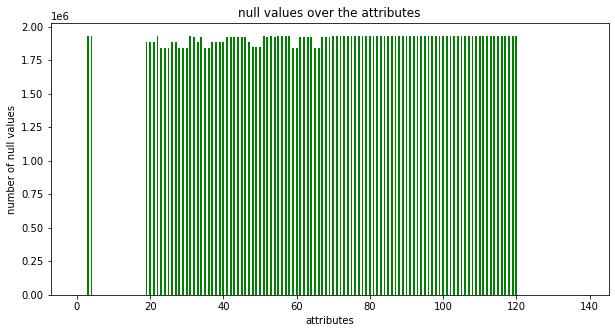

In [27]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(len(null_values_list))), null_values_list, color ='green',
        width = 0.5)
plt.xlabel("attributes")
plt.ylabel("number of null values")
plt.title("null values over the attributes")
plt.show()

In [28]:
f_data.shape

(1929870, 139)

#  Anomaly detection with Isolation Forest


In [29]:
# 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

contamination =0.01

df = f_data.copy()

In [ ]:
for col in df.columns:
  if df[col].dtype == "object":
    le = LabelEncoder()
    df[col].fillna("None", inplace=True)
    le.fit(list(df[col].astype(str).values))
    df[col]= le.transform(list(data[col].astype(str).values))
  else:
    df[col].fillna(-999, inplace=True)

In [ ]:
df.head()